In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113,
    start_char=1, oov_char=2, index_from=3)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
X= np.concatenate((x_train,x_test),axis=0)
y=np.concatenate((y_train,y_test),axis=0)

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
vocab_size=len(np.unique(np.hstack(X)))
vocab_size

88585

In [ ]:
review_length= [len(x) for x in X]

In [ ]:
import matplotlib.pyplot as plt


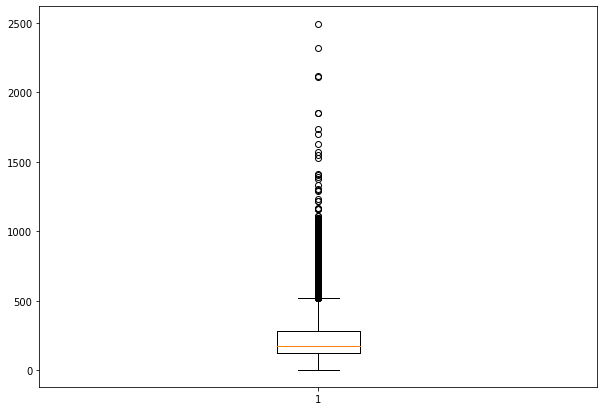

In [ ]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(review_length)
 
# show plot
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import sequence

In [ ]:
x_train=sequence.pad_sequences(x_train,maxlen=500)
x_test=sequence.pad_sequences(x_test,maxlen=500)

In [ ]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense,Flatten

In [ ]:
model = Sequential([
                    Embedding(1000, 32, input_length=500),
                    Flatten(),
                    Dense(250, activation='relu'),
                    Dense(1, activation='sigmoid')
                    ])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           32000     
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,032,501
Trainable params: 4,032,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
196/196 - 5s - loss: 0.5052 - accuracy: 0.7297 - val_loss: 0.3791 - val_accuracy: 0.8267
Epoch 2/10
196/196 - 2s - loss: 0.2499 - accuracy: 0.8986 - val_loss: 0.3544 - val_accuracy: 0.8490
Epoch 3/10
196/196 - 2s - loss: 0.1380 - accuracy: 0.9493 - val_loss: 0.4334 - val_accuracy: 0.8410
Epoch 4/10
196/196 - 2s - loss: 0.0584 - accuracy: 0.9834 - val_loss: 0.5439 - val_accuracy: 0.8344
Epoch 5/10
196/196 - 2s - loss: 0.0201 - accuracy: 0.9961 - val_loss: 0.7089 - val_accuracy: 0.8298
Epoch 6/10
196/196 - 2s - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.8122 - val_accuracy: 0.8298
Epoch 7/10
196/196 - 2s - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.8986 - val_accuracy: 0.8292
Epoch 8/10
196/196 - 2s - loss: 9.6531e-04 - accuracy: 1.0000 - val_loss: 0.9509 - val_accuracy: 0.8286
Epoch 9/10
196/196 - 2s - loss: 6.0978e-04 - accuracy: 1.0000 - val_loss: 0.9892 - val_accuracy: 0.8290
Epoch 10/10
196/196 - 2s - loss: 4.3999e-04 - accuracy: 1.0000 - val_loss: 1.0218 - val_accu

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


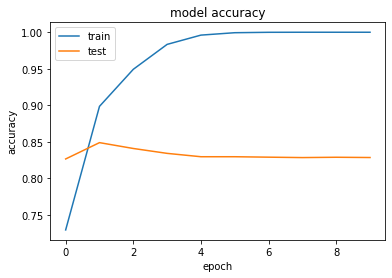

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print(scores[1])

0.8286799788475037


**The second model with LSTM**

In [ ]:
from keras.layers import LSTM

In [ ]:
model2 = Sequential([
                    Embedding(1000, 32, input_length=500),
                    LSTM(128),
                    Flatten(),
                    Dense(250, activation='relu'),
                    Dense(1, activation='sigmoid')
                    ])

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               82432     
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               32250     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 146,933
Trainable params: 146,933
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
196/196 - 28s - loss: 0.5903 - accuracy: 0.6787 - val_loss: 0.4102 - val_accuracy: 0.8165
Epoch 2/10
196/196 - 25s - loss: 0.3630 - accuracy: 0.8426 - val_loss: 0.3585 - val_accuracy: 0.8458
Epoch 3/10
196/196 - 25s - loss: 0.3330 - accuracy: 0.8604 - val_loss: 0.3348 - val_accuracy: 0.8613
Epoch 4/10
196/196 - 25s - loss: 0.3084 - accuracy: 0.8721 - val_loss: 0.3210 - val_accuracy: 0.8642
Epoch 5/10
196/196 - 25s - loss: 0.2991 - accuracy: 0.8762 - val_loss: 0.3496 - val_accuracy: 0.8500
Epoch 6/10
196/196 - 25s - loss: 0.2980 - accuracy: 0.8746 - val_loss: 0.3260 - val_accuracy: 0.8675
Epoch 7/10
196/196 - 25s - loss: 0.2812 - accuracy: 0.8860 - val_loss: 0.3315 - val_accuracy: 0.8649
Epoch 8/10
196/196 - 25s - loss: 0.2724 - accuracy: 0.8879 - val_loss: 0.3249 - val_accuracy: 0.8676
Epoch 9/10
196/196 - 25s - loss: 0.2669 - accuracy: 0.8919 - val_loss: 0.3310 - val_accuracy: 0.8594
Epoch 10/10
196/196 - 25s - loss: 0.2629 - accuracy: 0.8927 - val_loss: 0.3386 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


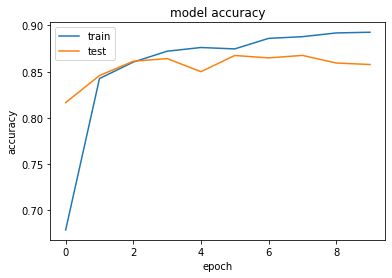

In [ ]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
scores = model2.evaluate(x_test, y_test, verbose=0)
print(scores[1])

0.8577600121498108
